# scikit-learn을 활용한 타이타닉 탑승객 생존 예측 classification

In [11]:
# 1. 데이터 불러오기

import pandas as pd
data = pd.read_csv('Titanic_dataset.csv')
data.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
# 2. 데이터 확인하기

data.describe(include = 'all')

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [13]:
# 3. 빠진 값 확인

data.isnull().sum()

pclass          0
survived        0
name            0
gender          0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [14]:
# 4. 사용하지 않는 feature 제거 

data.drop(['cabin', 'boat', 'body', 'name', 'ticket', 'home.dest'], axis=1, inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   gender    1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [16]:
data.isnull().sum()

pclass        0
survived      0
gender        0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [17]:
# 5. fare

data.fare.mean()

33.29547928134572

In [18]:
data.loc[data.fare.isnull(), 'fare'] = data.fare.mean()

data.isnull().sum()

# fare 처리 완료! 

pclass        0
survived      0
gender        0
age         263
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [19]:
# 6. age

data.age.mean()

29.8811345124283

In [20]:
data.loc[data.age.isnull(), 'age'] = data.age.mean()

data.isnull().sum()

pclass      0
survived    0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [22]:
# 7. embarked

data.groupby('embarked').size()
# 최빈값을 구하는 방법

embarked
C    270
Q    123
S    914
dtype: int64

In [23]:
data.loc[data.embarked.isnull(), 'embarked'] = 'S'

data.isnull().sum()

# 모든 값 채운 것을 확인할 수 있다. 

pclass      0
survived    0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [24]:
# 8. 시각화

import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data.survived.value_counts(normalize = True)

0    0.618029
1    0.381971
Name: survived, dtype: float64

C:\kimsohyeon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of survived')

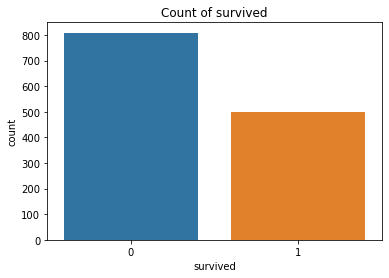

In [26]:
sns.countplot(data.survived)
plt.title('Count of survived')

C:\kimsohyeon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship between Gender and Survived')

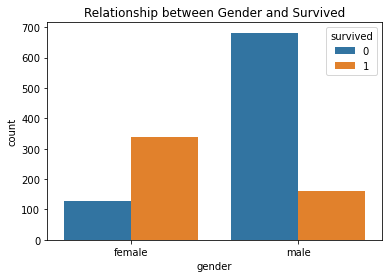

In [27]:
# 8-1. 성별에 따른 생존률

sns.countplot(data.gender, hue = data.survived)
plt.title('Relationship between Gender and Survived')

C:\kimsohyeon\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship between Class and Survived')

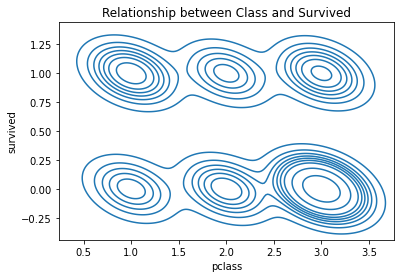

In [28]:
# 8.2 선실 등급에 따른 생존 확인

sns.kdeplot(data.pclass, data.survived)
plt.title('Relationship between Class and Survived')

### 3등급에서는 생존하지 못하는 비율이, 1등급에서는 생존하는 비율이 더 높음을 확인할 수 있다. 

In [32]:
# 9. 데이터 변환

data.loc[(data.gender) == 'male', 'gender'] = 0
data.loc[(data.gender) == 'female', 'gender'] = 1

data.loc[(data.embarked) == 'S', 'embarked'] = 0
data.loc[(data.embarked) == 'Q', 'embarked'] = 1
data.loc[(data.embarked) == 'C', 'embarked'] = 2

data.head()

# 스트링 데이터를 숫자로 모두 변환 완료! 

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,1,29.0000,0,0,211.3375,0
1,1,1,0,0.9167,1,2,151.5500,0
2,1,0,1,2.0000,1,2,151.5500,0
3,1,0,0,30.0000,1,2,151.5500,0
4,1,0,1,25.0000,1,2,151.5500,0


In [34]:
# 10. X / Y 분리

X = data.drop('survived', axis = 1)
Y = data.survived

print(X[:5])
print(Y[:5])

# X에는 피쳐만 들어있고, Y에는 타깃만 들어간 것을 확인할 수 있다. 

   pclass gender      age  sibsp  parch      fare embarked
0       1      1  29.0000      0      0  211.3375        0
1       1      0   0.9167      1      2  151.5500        0
2       1      1   2.0000      1      2  151.5500        0
3       1      0  30.0000      1      2  151.5500        0
4       1      1  25.0000      1      2  151.5500        0
0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64


In [37]:
# 11. 평가 셋, 훈련 셋 분리

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 109)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1047, 7)
(262, 7)
(1047,)
(262,)


In [40]:
# 12. 모델 학습

from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression()
log_classifier.fit(X_train, Y_train)

C:\kimsohyeon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
# 13. 모델 성능 확인

from sklearn.metrics import accuracy_score

y_predict = log_classifier.predict(X_test)
acc = accuracy_score(Y_test, y_predict)
print(acc)

0.7633587786259542


<AxesSubplot:>

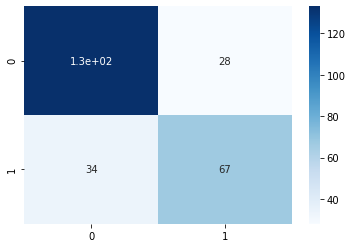

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_predict)
sns.heatmap(cm, annot = True, cmap = 'Blues')